In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df=df.drop('CustomerId',axis=1)
df=df.drop('Surname',axis=1)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
mp={'Male':0 , 'Female':1}
df['Gender']=df['Gender'].map(mp)


In [12]:
map={'France':0, 'Spain':1, 'Germany':2}
df['Geography']=df['Geography'].map(map)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [15]:
x=df.iloc[:,:10]
y=df.iloc[:,10]

In [16]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10


In [17]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

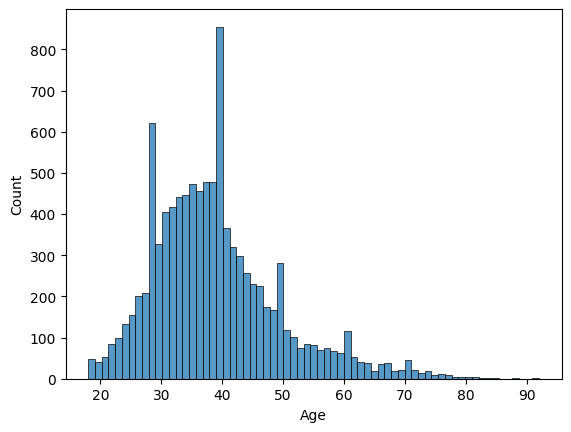

In [19]:
sns.histplot(df['Age'])

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:

classifier = Sequential()


classifier.add(Dense(units=6, input_dim=10, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(xtrain, ytrain, batch_size = 10, epochs = 100)

Epoch 1/100


700/700 [==============================] - 2s 1ms/step - loss: 0.4967 - accuracy: 0.7943
Epoch 2/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4299 - accuracy: 0.7944
Epoch 3/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.8040
Epoch 4/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.8286
Epoch 5/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4123 - accuracy: 0.8334
Epoch 6/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8373
Epoch 7/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4059 - accuracy: 0.8379
Epoch 8/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4041 - accuracy: 0.8391
Epoch 9/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4018 - accuracy: 0.8383
Epoch 10/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4004 - accu

In [35]:
classifier.save("churn.h5")

C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
y_pred = classifier.predict(xtest)
y_pred = (y_pred > 0.5)

94/94 [==============================] - 0s 2ms/step


In [39]:
cm=confusion_matrix(y_pred,ytest)

In [41]:
cm

array([[2263,  311],
       [ 139,  287]], dtype=int64)

<Axes: >

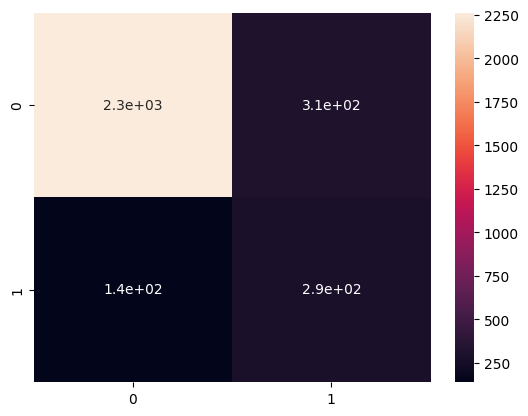

In [42]:
sns.heatmap(cm,annot=True)